In [1]:
# CONFIGURACIÓN DE IMPORTACIÓN DE FUNCIONES
import sys
import os
import pandas as pd

src_path = os.path.abspath(os.path.join('..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from data.processing import procesar_contaminante, procesar_meteorologia, unir_datasets
# CARGA DE ARCHIVOS CSV
df_pm10 = pd.read_csv('../data/raw/pm 10 coyhaique (extended).csv', sep=';', encoding='latin1', engine='python')
df_pm25 = pd.read_csv('../data/raw/pm 2.5 coyhaique.csv', sep=';')
df_co = pd.read_csv('../data/raw/CO coyhaique.csv', sep=';')
df_so2 = pd.read_csv('../data/raw/SO2 coyahique.csv', sep=';')
df_meteo = pd.read_csv('../data/raw/export (extended).csv')
df_umbrales = pd.read_csv('../data/raw/umbrales_pm10.csv', sep=';')

# Limpieza (con inportación de funciones)

In [2]:
# APLICACIÓN DE FUNCIONES DE LIMPIEZA
df_pm10 = procesar_contaminante(df_pm10, 'PM10')
df_pm25 = procesar_contaminante(df_pm25, 'PM2.5')
df_co = procesar_contaminante(df_co, 'CO', decimal_coma=True)
df_so2 = procesar_contaminante(df_so2, 'SO2')
df_meteo = procesar_meteorologia(df_meteo)

# Unificar Datasets

In [3]:
# UNIFICACIÓN FINAL DE LOS DATOS
df_total = unir_datasets(df_pm10, df_pm25, df_co, df_so2, df_meteo, df_umbrales)

# VERIFICACIÓN
print("✅ Dataset final unificado con forma:", df_total.shape)
print("Columnas disponibles:", df_total.columns.tolist())
print("Distribución de clases de riesgo:")
print(df_total['Riesgo'].value_counts())

✅ Dataset final unificado con forma: (6623, 11)
Columnas disponibles: ['PM10', 'Riesgo', 'PM2.5', 'CO', 'SO2', 'tmin', 'tavg', 'tmax', 'prcp', 'wspd', 'pres']
Distribución de clases de riesgo:
Riesgo
Bajo     4952
Medio    1204
Alto      467
Name: count, dtype: int64


# Analizar Outliers

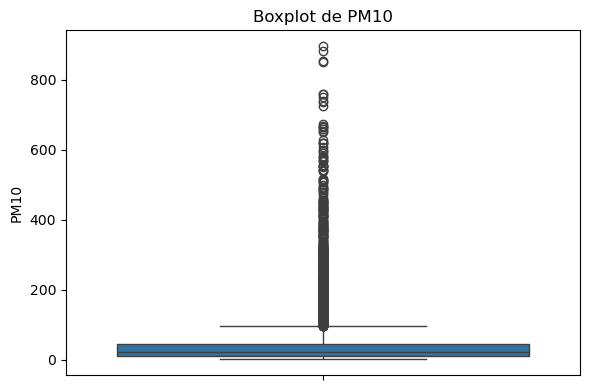

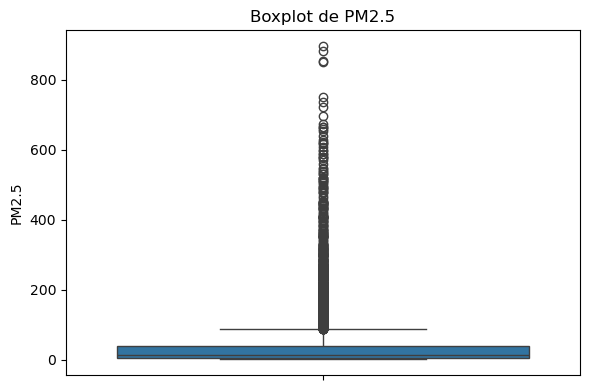

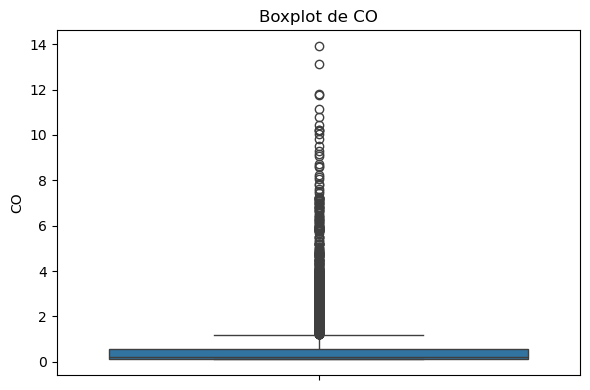

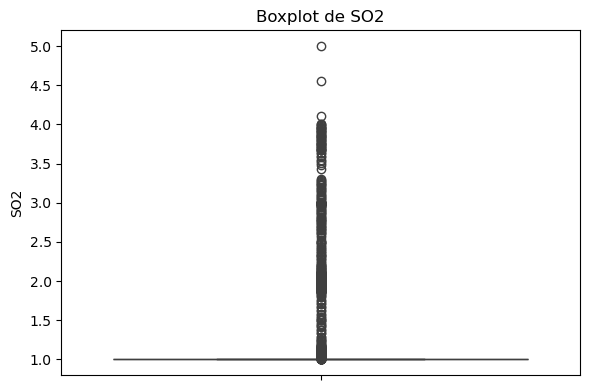

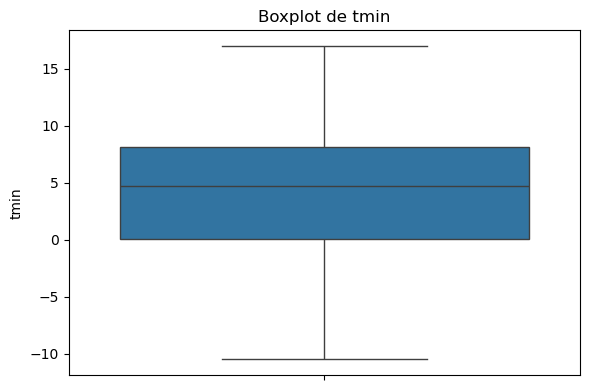

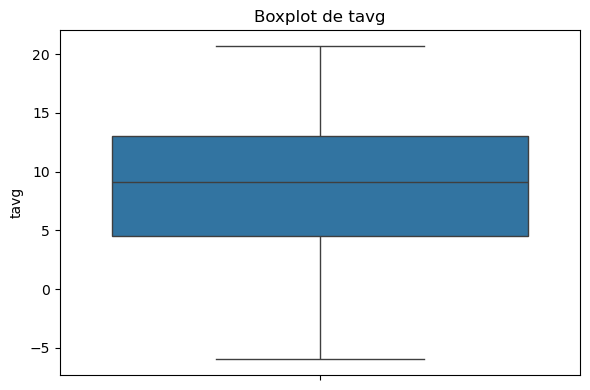

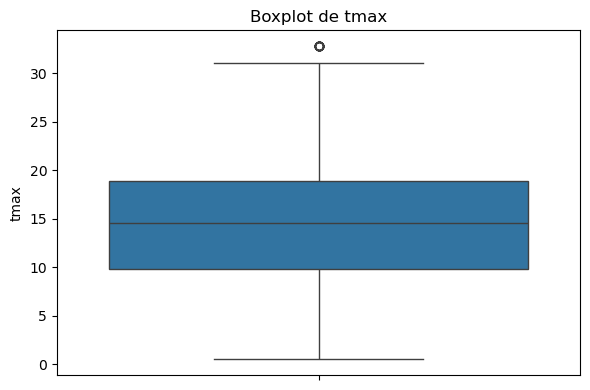

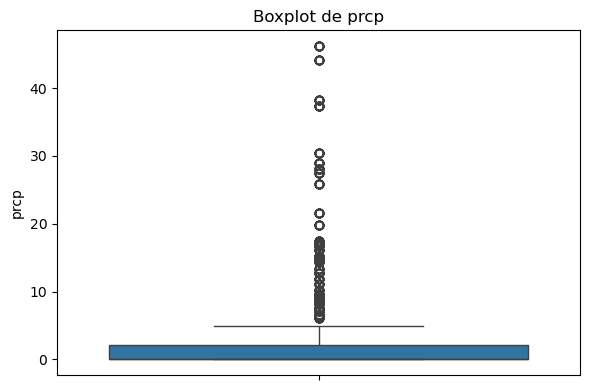

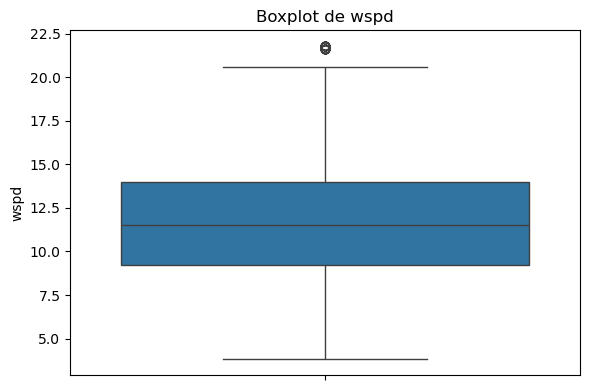

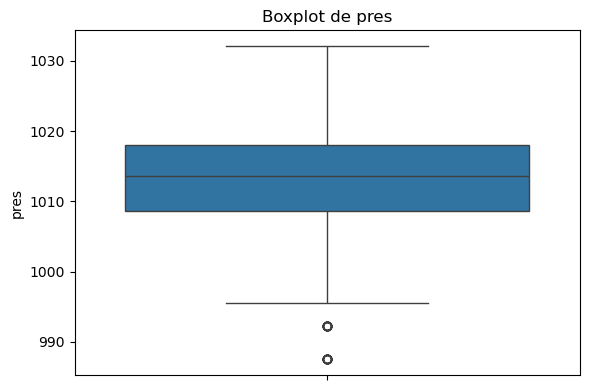

In [4]:
# VISUALIZACIÓN DE OUTLIERS (BOXPLOTS)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas numéricas del dataset total
df_total_numeric = df_total.select_dtypes(include=[np.number])

# Recorremos cada variable y graficamos su boxplot
for col in df_total_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_total_numeric[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

# Modelado

In [5]:
import sys
import os

src_path = os.path.abspath(os.path.join('..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

In [6]:
from models.training import entrenar_modelos

Accuracy Árbol de Decisión: 1.0
Accuracy Random Forest: 1.0


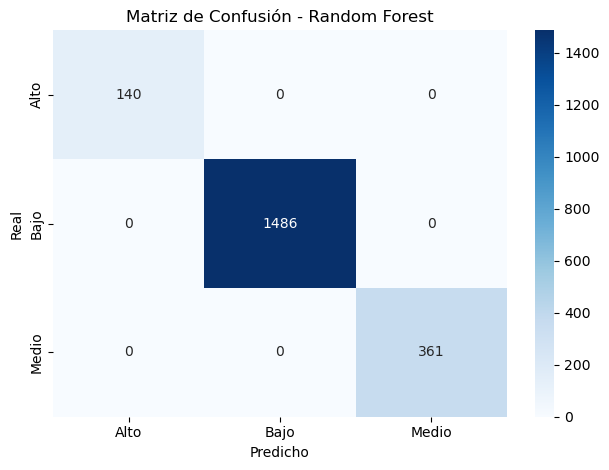

In [7]:
# ENTRENAR LOS MODELOS
dt_model, rf_model, resultados = entrenar_modelos(df_total)

# VER RESULTADOS
print("Accuracy Árbol de Decisión:", resultados['accuracy_dt'])
print("Accuracy Random Forest:", resultados['accuracy_rf'])

# Matriz de confusión y F1 por clase
import seaborn as sns
import matplotlib.pyplot as plt

conf = resultados['confusion_rf']
etiquetas = resultados['label_encoder'].classes_

sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()
